In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/datasets

/content/gdrive/My Drive/datasets


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

In [6]:
df_c = pd.read_excel("ab_testing_data.xlsx", sheet_name="Control Group")
df_t = pd.read_excel("ab_testing_data.xlsx", sheet_name="Test Group")
df_control = df_c.copy()
df_test = df_t.copy()

In [10]:
df_control.head(10)

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179
5,77773.633900,4462.206586,519.669656,2081.851850
6,95110.586266,3555.580670,512.928746,1815.006614
7,106649.183075,4358.027043,747.020123,1965.100400
8,122709.716594,5091.558964,745.985682,1651.662991
9,79498.248658,6653.845515,470.501367,2456.304240


In [9]:
df_test.head(10)

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521
5,115923.006949,4213.868620,778.373161,2157.408552
6,106116.436642,3279.472973,491.614531,2560.411202
7,125957.116104,4690.569911,855.719803,2563.579756
8,117442.864652,3907.939237,660.477912,2242.232586
9,131271.715604,4721.187812,532.279336,2368.108569


In [11]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [13]:
check_df(df_control)
print("---------------------------------------")
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
     Impression        Click    Purchase      Earning
0  82529.459271  6090.077317  665.211255  2311.277143
1  98050.451926  3382.861786  315.084895  1742.806855
2  82696.023549  4167.965750  458.083738  1797.827447
##################### Tail #####################
       Impression        Click    Purchase      Earning
37  123678.934234  3649.073787  476.168128  2187.721217
38  101997.494099  4736.353369  474.613537  2254.563834
39  121085.881220  4285.178608  590.406020  1289.308948
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64
##################### Quantiles #####################
                    0.00          0.05  ...           0.99           1.00


##**1. Normallik Varsayımı**

In [ ]:
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır.
# shapiro testi

In [17]:
test_istatistigi, pvalue = shapiro(df_control["Purchase"]) 
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

# p-value < 0.05 olmadığı için H0 REDDEDİLEMEZ. -> normal dağılım

Test İstatistiği = 0.9773, p-değeri = 0.5891


In [18]:
test_istatistigi, pvalue = shapiro(df_test["Purchase"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

# p-value <0.05 olmadığı için H0 REDDEDİLEMEZ. -> normal dağılım

Test İstatistiği = 0.9589, p-değeri = 0.1541


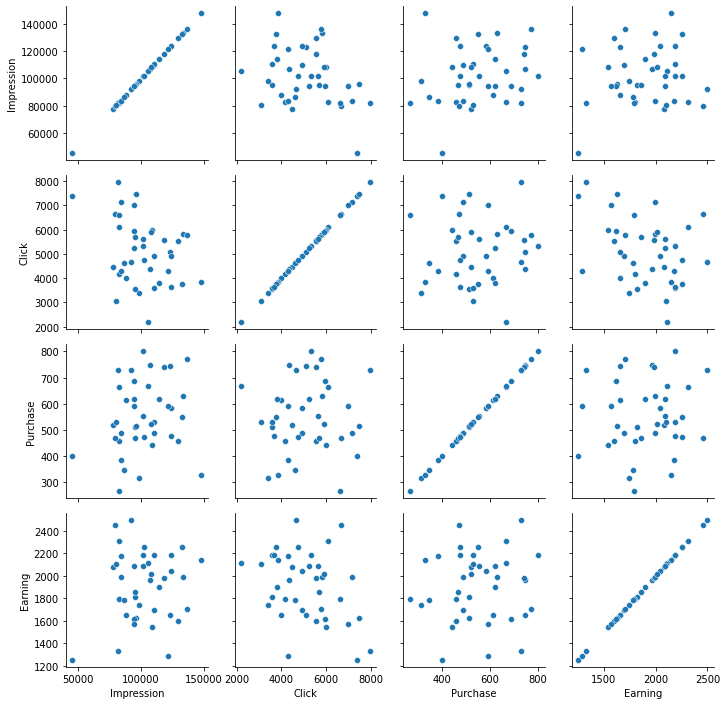

In [33]:
g = sns.PairGrid(df_control)
g.map(sns.scatterplot)

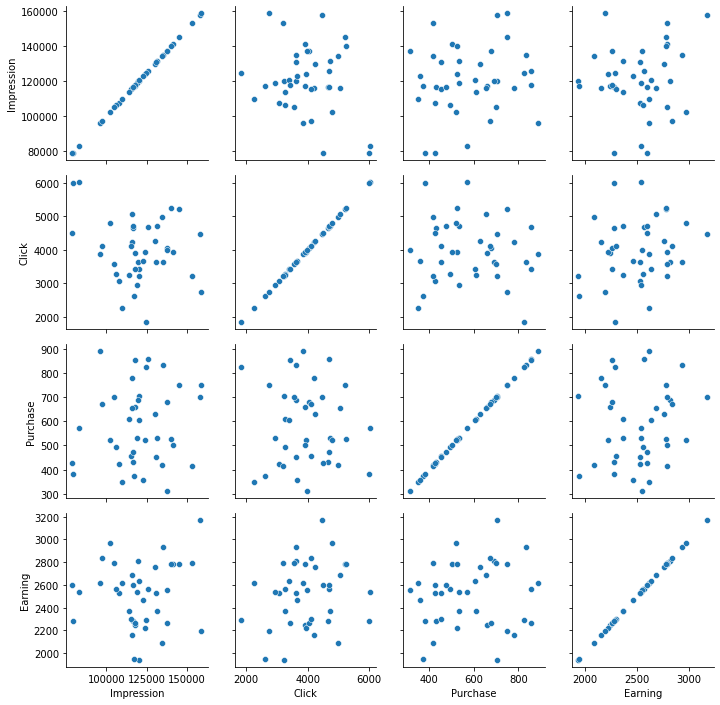

In [29]:
g_2 = sns.PairGrid(df_test)
g_2.map(sns.scatterplot)

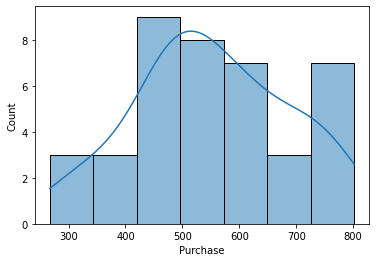

In [37]:
sns.histplot(data=df_control, x="Purchase", kde=True) #dağılım

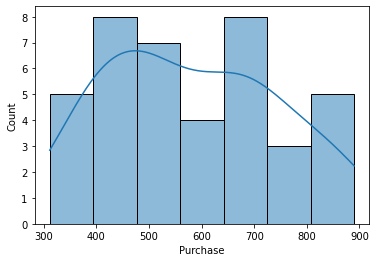

In [38]:
sns.histplot(data=df_test, x="Purchase", kde=True) #dağılım

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


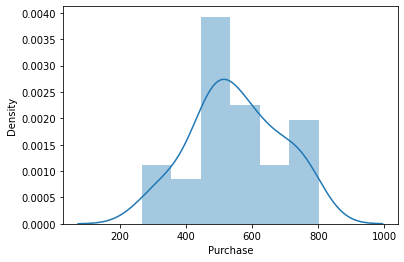

In [40]:
sns.distplot(df_control['Purchase'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


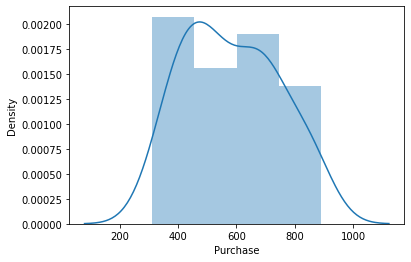

In [42]:
sns.distplot(df_test['Purchase'])

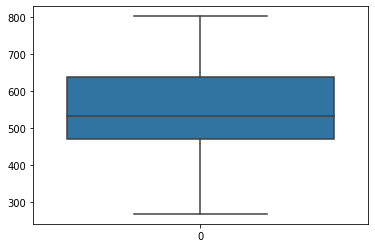

In [44]:
 sns.boxplot(data=df_control.Purchase)

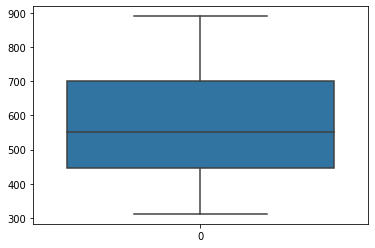

In [45]:
 sns.boxplot(data=df_test.Purchase)

## **2. Varyans Homojenligi Varsayımı**

In [ ]:
# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir
# levene testi

In [15]:
stats.levene(df_control["Purchase"],df_test["Purchase"])
#  p-value <0.05 olmadığı için H0 REDDEDİLEMEZ. Varyans homojen 

LeveneResult(statistic=2.6392694728747363, pvalue=0.10828588271874791)

## **3. Hipotezin Uygulanması**

In [ ]:
# H0: M1 = M2 (... iki grup ortalamaları arasında ist ol.anl.fark yoktur.)
# H1: M1 != M2 (...vardır)

# Her iki varsayımda sağlandığı için bağımsız iki örneklem t testi (parametrik test) yapılır.

In [19]:
test_istatistigi, pvalue = stats.ttest_ind(df_control["Purchase"],
                                           df_test["Purchase"],
                                           equal_var=True)

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -0.9416, p-değeri = 0.3493


In [ ]:
# p-value < ise 0.05'ten HO RED.
# p-value < değilse 0.05 H0 REDDEDILEMEZ.
# ÇIKTIya göre:
#  p-value <0.05 olmadığı için H0 REDDEDİLEMEZ.


# max bidding ve average bidding grupları arasında istatistiksel olarak anlamlı bir farklılık yoktur.
# Aralarındaki matematiksel farklılık şans eseri oluşmuştur.